# Data Preprocessing and feature engineering 

## Importing Library


In [116]:
import os
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Data Importing

In [117]:
train_df = pd.read_csv('/Users/macbookpro/Desktop/lxc/git/MMA_Enterprise/Revenue-Radar/Data/train_df.csv')

null = []
for n in train_df.columns:
    if train_df[n].nunique(dropna=False) == 1:
        null.append(n)

null

/var/folders/9z/gkk8fkkj0pz746hrzcw69dq40000gn/T/ipykernel_7875/1626016371.py:1: DtypeWarning:

Columns (2,34) have mixed types. Specify dtype option on import or set low_memory=False.



[]

## Data Preprocessing 


In [118]:
train_df.head()
train_df.columns.to_list()



['channelGrouping',
 'date',
 'fullVisitorId',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device.browser',
 'device.operatingSystem',
 'device.isMobile',
 'device.deviceCategory',
 'geoNetwork.continent',
 'geoNetwork.subContinent',
 'geoNetwork.country',
 'geoNetwork.region',
 'geoNetwork.metro',
 'geoNetwork.city',
 'geoNetwork.networkDomain',
 'totals.hits',
 'totals.pageviews',
 'totals.bounces',
 'totals.newVisits',
 'totals.transactionRevenue',
 'trafficSource.campaign',
 'trafficSource.source',
 'trafficSource.medium',
 'trafficSource.keyword',
 'trafficSource.isTrueDirect',
 'trafficSource.referralPath',
 'trafficSource.adwordsClickInfo.page',
 'trafficSource.adwordsClickInfo.slot',
 'trafficSource.adwordsClickInfo.gclId',
 'trafficSource.adwordsClickInfo.adNetworkType',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.adContent',
 'trafficSource.campaignCode']

In [119]:
import itertools

columns = sorted(train_df.columns.tolist())
grouped_columns = [list(group) for key, group in itertools.groupby(columns, lambda x: x[0])]

for group in grouped_columns:
    print(", ".join(group))

channelGrouping
date, device.browser, device.deviceCategory, device.isMobile, device.operatingSystem
fullVisitorId
geoNetwork.city, geoNetwork.continent, geoNetwork.country, geoNetwork.metro, geoNetwork.networkDomain, geoNetwork.region, geoNetwork.subContinent
totals.bounces, totals.hits, totals.newVisits, totals.pageviews, totals.transactionRevenue, trafficSource.adContent, trafficSource.adwordsClickInfo.adNetworkType, trafficSource.adwordsClickInfo.gclId, trafficSource.adwordsClickInfo.isVideoAd, trafficSource.adwordsClickInfo.page, trafficSource.adwordsClickInfo.slot, trafficSource.campaign, trafficSource.campaignCode, trafficSource.isTrueDirect, trafficSource.keyword, trafficSource.medium, trafficSource.referralPath, trafficSource.source
visitId, visitNumber, visitStartTime


In [120]:
#drop the columns that have not available in demo dataset
columns_to_drop = [col for col in train_df.columns if train_df[col].eq('NaN').any()]
df_dropped = train_df.drop(columns=columns_to_drop)




In [121]:
#check the na percentage compare to total data
na_percentage = df_dropped.isna().sum() / len(df_dropped)
na_percentage = na_percentage.sort_values(ascending=False)

na_percentage




trafficSource.campaignCode                      0.999999
trafficSource.adContent                         0.987887
totals.transactionRevenue                       0.987257
trafficSource.adwordsClickInfo.isVideoAd        0.976252
trafficSource.adwordsClickInfo.adNetworkType    0.976252
trafficSource.adwordsClickInfo.slot             0.976252
trafficSource.adwordsClickInfo.page             0.976252
trafficSource.adwordsClickInfo.gclId            0.976140
trafficSource.isTrueDirect                      0.696781
trafficSource.referralPath                      0.633774
trafficSource.keyword                           0.556551
totals.bounces                                  0.501324
totals.newVisits                                0.221980
totals.pageviews                                0.000111
trafficSource.medium                            0.000000
trafficSource.source                            0.000000
trafficSource.campaign                          0.000000
channelGrouping                

Percentage of customers producing revenue: 1.40%

In [122]:
import numpy as np
import pandas as pd

gdf = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

gdf["totals.transactionRevenue"] = pd.to_numeric(gdf["totals.transactionRevenue"], errors="coerce")

gdf = gdf.dropna(subset=["totals.transactionRevenue"])

gdf["totals.transactionRevenue"] = np.sort(gdf["totals.transactionRevenue"])

total_customers = gdf.shape[0]
revenue_customers = gdf[gdf["totals.transactionRevenue"] > 0].shape[0]
percentage_revenue_customers = (revenue_customers / total_customers) * 100

print("Percentage of customers producing revenue: {:.2f}%".format(percentage_revenue_customers))


Percentage of customers producing revenue: 1.40%


## Regression model on revenue (Only with data that percentage of customers producing data)


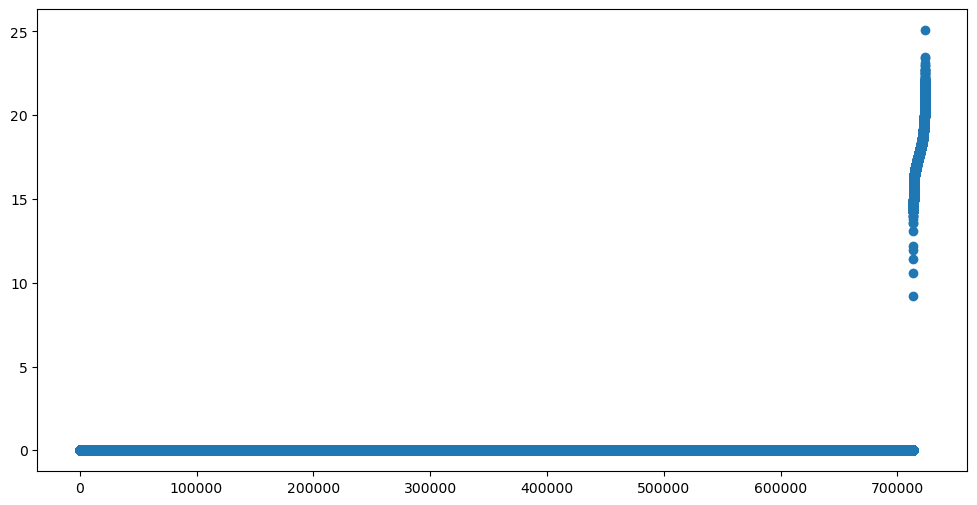

In [123]:
# Plotting the distribution of the total revenue
plt.figure(figsize=(12,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))

In [124]:
# check how many data we have for each column
count = df_dropped.count()
count = count.sort_values(ascending=False)
count

channelGrouping                                 903653
geoNetwork.subContinent                         903653
trafficSource.medium                            903653
trafficSource.source                            903653
trafficSource.campaign                          903653
date                                            903653
geoNetwork.networkDomain                        903653
geoNetwork.city                                 903653
geoNetwork.metro                                903653
geoNetwork.region                               903653
geoNetwork.country                              903653
totals.hits                                     903653
geoNetwork.continent                            903653
visitStartTime                                  903653
fullVisitorId                                   903653
device.deviceCategory                           903653
visitNumber                                     903653
visitId                                         903653
device.bro

In [125]:
"""
trafficSource.campaignCode                      0.999999
trafficSource.adContent                         0.987887
totals.transactionRevenue                       0.987257
trafficSource.adwordsClickInfo.isVideoAd        0.976252
trafficSource.adwordsClickInfo.adNetworkType    0.976252
trafficSource.adwordsClickInfo.slot             0.976252
trafficSource.adwordsClickInfo.page             0.976252
trafficSource.adwordsClickInfo.gclId            0.976140
trafficSource.isTrueDirect                      0.696781
trafficSource.referralPath                      0.633774
trafficSource.keyword                           0.556551
totals.bounces                                  0.501324
"""
#drop these columns
df_1 = df_dropped.drop(columns=['trafficSource.campaignCode', 'trafficSource.adContent', 
                                       'trafficSource.adwordsClickInfo.isVideoAd', 
                                      'trafficSource.adwordsClickInfo.adNetworkType', 
                                      'trafficSource.adwordsClickInfo.slot', 'trafficSource.adwordsClickInfo.page', 
                                      'trafficSource.adwordsClickInfo.gclId', 
                                      'trafficSource.isTrueDirect', 'trafficSource.referralPath', 
                                      'trafficSource.keyword', 'totals.bounces', 'fullVisitorId', 'visitId'])

# what if drop na
df_2 = df_1.dropna()

# check how many data left
count1 = df_1.count()
count1 = count1.sort_values(ascending=False)

count2 = df_2.count()
count2 = count2.sort_values(ascending=False)


print(count1)
print(count2)


channelGrouping              903653
geoNetwork.country           903653
trafficSource.source         903653
trafficSource.campaign       903653
totals.hits                  903653
geoNetwork.networkDomain     903653
geoNetwork.city              903653
geoNetwork.metro             903653
date                         903653
geoNetwork.region            903653
geoNetwork.subContinent      903653
geoNetwork.continent         903653
device.deviceCategory        903653
device.isMobile              903653
device.operatingSystem       903653
device.browser               903653
visitStartTime               903653
visitNumber                  903653
trafficSource.medium         903653
totals.pageviews             903553
totals.newVisits             703060
totals.transactionRevenue     11515
dtype: int64
channelGrouping              4465
date                         4465
trafficSource.source         4465
trafficSource.campaign       4465
totals.transactionRevenue    4465
totals.newVisits         

In [126]:
df_2 = df_1.copy()

In [127]:
# only use the data that has transaction revenue
df_2 = df_2[df_2['totals.transactionRevenue'] > 0]

# check how many data left
count2 = df_2.count()
count2 = count2.sort_values(ascending=False)
count2

channelGrouping              11515
date                         11515
trafficSource.source         11515
trafficSource.campaign       11515
totals.transactionRevenue    11515
totals.pageviews             11515
totals.hits                  11515
geoNetwork.networkDomain     11515
geoNetwork.city              11515
geoNetwork.metro             11515
geoNetwork.region            11515
geoNetwork.country           11515
geoNetwork.subContinent      11515
geoNetwork.continent         11515
device.deviceCategory        11515
device.isMobile              11515
device.operatingSystem       11515
device.browser               11515
visitStartTime               11515
visitNumber                  11515
trafficSource.medium         11515
totals.newVisits              4465
dtype: int64

In [128]:
import pandas as pd

# Assuming df_2 is your DataFrame and has already been loaded

# Step 1: Convert 'totals.newVisits' to categorical
df_2['totals.newVisits'] = df_2['totals.newVisits'].astype('category')

# Check unique values before making changes
print("Unique values before:", df_2['totals.newVisits'].unique())

# Step 2: Fill NA/NaN values with 0
df_2['totals.newVisits'] = df_2['totals.newVisits'].cat.add_categories([0]).fillna(0)

# Step 3: Ensure all values are either 1 or 0
df_2['totals.newVisits'] = df_2['totals.newVisits'].apply(lambda x: 1 if x == 1 else 0).astype('category')

# Check unique values after making changes
print("Unique values after:", df_2['totals.newVisits'].unique())


Unique values before: [1.0, NaN]
Categories (1, float64): [1.0]
Unique values after: [1, 0]
Categories (2, int64): [1, 0]


/var/folders/9z/gkk8fkkj0pz746hrzcw69dq40000gn/T/ipykernel_7875/805069265.py:9: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



In [129]:
df_2.head()

channelGrouping      date  visitNumber  visitStartTime device.browser  \
752          Direct  20160902            1      1472843572         Chrome   
753  Organic Search  20160902            3      1472844906         Chrome   
799        Referral  20160902            7      1472827393         Chrome   
802        Referral  20160902            6      1472846398         Chrome   
859        Referral  20160902            4      1472824817         Chrome   

    device.operatingSystem  device.isMobile device.deviceCategory  \
752                  Linux            False               desktop   
753              Macintosh            False               desktop   
799                  Linux            False               desktop   
802                Windows            False               desktop   
859              Macintosh            False               desktop   

    geoNetwork.continent geoNetwork.subContinent  ...  \
752             Americas        Northern America  ...   
753             Americas        Northern America  ...   
799             Americas        Northern America  ...   
802             Americas        Northern America  ...   
859             Americas        Northern America  ...   

                      geoNetwork.metro                geoNetwork.city  \
752                         Detroit MI                      Ann Arbor   
753                        New York NY                       New York   
799                        New York NY                       New York   
802  San Francisco-Oakland-San Jose CA                  Mountain View   
859      not available in demo dataset  not available in demo dataset   

    geoNetwork.networkDomain totals.hits totals.pageviews  totals.newVisits  \
752                (not set)          11             11.0                 1   
753                (not set)          11             10.0                 0   
799                (not set)          13             11.0                 0   
802                (not set)          13             12.0                 0   
859                (not set)          17             14.0                 0   

     totals.transactionRevenue trafficSource.campaign  trafficSource.source  \
752                 37860000.0              (not set)              (direct)   
753                306670000.0              (not set)                google   
799                 68030000.0              (not set)   mall.googleplex.com   
802                 26250000.0              (not set)   mall.googleplex.com   
859                574150000.0              (not set)   mall.googleplex.com   

    trafficSource.medium  
752               (none)  
753              organic  
799             referral  
802             referral  
859             referral  

[5 rows x 22 columns]

In [130]:
# make date to datetime
df_2['date'] = pd.to_datetime(df_2['date'], format='%Y%m%d')

In [131]:
df_2.dtypes

channelGrouping                      object
date                         datetime64[ns]
visitNumber                           int64
visitStartTime                        int64
device.browser                       object
device.operatingSystem               object
device.isMobile                        bool
device.deviceCategory                object
geoNetwork.continent                 object
geoNetwork.subContinent              object
geoNetwork.country                   object
geoNetwork.region                    object
geoNetwork.metro                     object
geoNetwork.city                      object
geoNetwork.networkDomain             object
totals.hits                           int64
totals.pageviews                    float64
totals.newVisits                   category
totals.transactionRevenue           float64
trafficSource.campaign               object
trafficSource.source                 object
trafficSource.medium                 object
dtype: object

## NOT include Time Series - more data cleaning and feature selection 

In [132]:
#type of each row
df_2.dtypes
#drop the date
df_3 = df_2.drop(columns=['geoNetwork.metro','geoNetwork.networkDomain','visitNumber','geoNetwork.city',
                          'visitStartTime','trafficSource.source'])
df_3.head()

channelGrouping       date device.browser device.operatingSystem  \
752          Direct 2016-09-02         Chrome                  Linux   
753  Organic Search 2016-09-02         Chrome              Macintosh   
799        Referral 2016-09-02         Chrome                  Linux   
802        Referral 2016-09-02         Chrome                Windows   
859        Referral 2016-09-02         Chrome              Macintosh   

     device.isMobile device.deviceCategory geoNetwork.continent  \
752            False               desktop             Americas   
753            False               desktop             Americas   
799            False               desktop             Americas   
802            False               desktop             Americas   
859            False               desktop             Americas   

    geoNetwork.subContinent geoNetwork.country              geoNetwork.region  \
752        Northern America      United States                       Michigan   
753        Northern America      United States                       New York   
799        Northern America      United States                       New York   
802        Northern America      United States                     California   
859        Northern America      United States  not available in demo dataset   

     totals.hits  totals.pageviews totals.newVisits  \
752           11              11.0                1   
753           11              10.0                0   
799           13              11.0                0   
802           13              12.0                0   
859           17              14.0                0   

     totals.transactionRevenue trafficSource.campaign trafficSource.medium  
752                 37860000.0              (not set)               (none)  
753                306670000.0              (not set)              organic  
799                 68030000.0              (not set)             referral  
802                 26250000.0              (not set)             referral  
859                574150000.0              (not set)             referral

In [133]:
#check the unique value of each column for categorical data
for col in df_3.columns:
    if df_3[col].dtype == 'object':
        print(col, df_3[col].nunique())
        print('\n')
        # print each unique value
        print(df_3[col].unique())
        print('\n')
        # print the value counts
        print(df_3[col].value_counts())
    else:
        continue


        

channelGrouping 8


['Direct' 'Organic Search' 'Referral' 'Display' 'Paid Search' 'Social'
 'Affiliates' '(Other)']


Referral          5311
Organic Search    3438
Direct            2042
Paid Search        468
Display            142
Social             104
Affiliates           9
(Other)              1
Name: channelGrouping, dtype: int64
device.browser 9


['Chrome' 'Safari' 'Firefox' 'Safari (in-app)' 'Edge' 'Internet Explorer'
 'Android Webview' 'Opera' 'Amazon Silk']


Chrome               10353
Safari                 780
Firefox                191
Internet Explorer      109
Edge                    58
Safari (in-app)         12
Android Webview          6
Opera                    5
Amazon Silk              1
Name: device.browser, dtype: int64
device.operatingSystem 7


['Linux' 'Macintosh' 'Windows' 'Android' 'Chrome OS' 'iOS' 'Windows Phone']


Macintosh        6426
Windows          2309
Chrome OS         994
Linux             782
iOS               536
Android           467
Windows Ph

In [134]:
df_4 = df_3.drop(columns=['geoNetwork.subContinent','trafficSource.campaign','geoNetwork.continent'])


In [135]:


# Assuming your DataFrame is named df (replace with the actual name of your DataFrame)

# Filter the DataFrame to include only rows where 'geoNetwork.country' is 'United States' or 'Canada'
df_4= df_4[(df_4['geoNetwork.country'] == 'United States')]

# drop country column
df_4 = df_4.drop(columns=['geoNetwork.country'])

# Now, filtered_df contains only the rows with 'United States' and 'Canada'


print(df_4['geoNetwork.region'].unique())


['Michigan' 'New York' 'California' 'not available in demo dataset'
 'Washington' 'Illinois' 'Oregon' 'District of Columbia' 'Massachusetts'
 '(not set)' 'Virginia' 'Georgia' 'Texas' 'Pennsylvania' 'Nevada'
 'North Carolina' 'State of Rio de Janeiro' 'Colorado' 'New Jersey'
 'Florida' 'Nebraska' 'South Carolina' 'Utah' 'Tennessee' 'Zulia'
 'Ontario' 'Arizona' 'Ohio' 'Iowa' 'Catalonia' 'Missouri' 'Vienna'
 'Maryland' 'Minnesota' 'England' 'Indiana' 'Connecticut' 'Quebec'
 'Wisconsin']


In [136]:
df_4['channelGrouping'] = df_4['channelGrouping'].replace(['Social', 'Display', 'Affiliates', '(Other)'], 'Other')
print(df_4['channelGrouping'].value_counts())


browsers_to_keep = ['Chrome']
df_4['device.browser'] = df_4['device.browser'].apply(lambda x: x if x in browsers_to_keep else 'Rest')
# After the modification, to see the count of each category, you can use value_counts()
print(df_4['device.browser'].value_counts())


# For the 'device.operatingSystem' column
# Replace 'Macintosh' with 'Mac', 'Windows' remains the same, and classify others as 'Mobile'
df_4['device.operatingSystem'] = df_4['device.operatingSystem'].replace(['Linux', 'Android', 'iOS', 'Chrome OS','Windows Phone'], 'Mobile')
df_4['device.operatingSystem'] = df_4['device.operatingSystem'].replace(['Macintosh'], 'Mac')

# Assuming 'device.deviceCategory' needs to be updated based on 'device.operatingSystem'
# This step seems a bit confusing because 'deviceCategory' typically indicates the type of device (e.g., desktop, mobile, tablet)
# If you intended to classify 'deviceCategory' based on 'operatingSystem', let's clarify the approach:
# - 'Mac' and 'Windows' could be considered 'desktop' in many contexts
# - 'Mobile' could map to 'mobile' and 'tablet'
# If the task is to adjust 'device.deviceCategory' based on these new 'operatingSystem' categories:
df_4['device.deviceCategory'] = df_4['device.operatingSystem'].apply(lambda x: 'desktop' if x in ['Mac', 'Windows'] else 'mobile')

# drop device category
df_4 = df_4.drop(columns=['device.deviceCategory'])

# After reclassification, to see the count of each category in 'device.operatingSystem'
print(df_4['device.operatingSystem'].value_counts())


df_4['geoNetwork.region'] = df_4['geoNetwork.region'].replace(['not available in demo dataset', '(not set)'], 'Unknown')


Referral          5197
Organic Search    3111
Direct            1939
Paid Search        463
Other              243
Name: channelGrouping, dtype: int64
Chrome    9881
Rest      1072
Name: device.browser, dtype: int64
Mac        6176
Mobile     2674
Windows    2103
Name: device.operatingSystem, dtype: int64


In [137]:
for col in df_4.columns:
    if df_4[col].dtype == 'object':
        print(col, df_4[col].nunique())
        print('\n')
        # print each unique value
        print(df_4[col].unique())
        print('\n')
        # print the value counts
        print(df_4[col].value_counts())
    else:
        continue


channelGrouping 5


['Direct' 'Organic Search' 'Referral' 'Other' 'Paid Search']


Referral          5197
Organic Search    3111
Direct            1939
Paid Search        463
Other              243
Name: channelGrouping, dtype: int64
device.browser 2


['Chrome' 'Rest']


Chrome    9881
Rest      1072
Name: device.browser, dtype: int64
device.operatingSystem 3


['Mobile' 'Mac' 'Windows']


Mac        6176
Mobile     2674
Windows    2103
Name: device.operatingSystem, dtype: int64
geoNetwork.region 38


['Michigan' 'New York' 'California' 'Unknown' 'Washington' 'Illinois'
 'Oregon' 'District of Columbia' 'Massachusetts' 'Virginia' 'Georgia'
 'Texas' 'Pennsylvania' 'Nevada' 'North Carolina'
 'State of Rio de Janeiro' 'Colorado' 'New Jersey' 'Florida' 'Nebraska'
 'South Carolina' 'Utah' 'Tennessee' 'Zulia' 'Ontario' 'Arizona' 'Ohio'
 'Iowa' 'Catalonia' 'Missouri' 'Vienna' 'Maryland' 'Minnesota' 'England'
 'Indiana' 'Connecticut' 'Quebec' 'Wisconsin']


Unknown                    4312
Cali

In [138]:
df_4['trafficSource.medium'] = df_4['trafficSource.medium'].replace('(none)', 'none')

# Combine 'cpc', 'cpm', 'affiliate', and '(not set)' into 'rest'
df_4['trafficSource.medium'] = df_4['trafficSource.medium'].replace(['cpc', 'cpm', 'affiliate', '(not set)'], 'rest')

# After reclassification, to see the count of each category
print(df_4['trafficSource.medium'].value_counts())

referral    5289
organic     3111
none        1939
rest         614
Name: trafficSource.medium, dtype: int64


In [139]:
import pandas as pd

# Assuming your DataFrame is named df and already has 'Unknown' consolidated

# Define the states as 'West' or 'East'
west_states = ['California', 'Washington', 'Texas', 'Colorado', 'Arizona', 'Oregon', 'Nevada', 'Utah']
east_states = ['New York', 'Illinois', 'Michigan', 'Massachusetts', 'Georgia', 'District of Columbia', 
               'Pennsylvania', 'New Jersey', 'North Carolina', 'Minnesota', 'Missouri', 'Florida', 
               'Tennessee', 'Iowa', 'Virginia', 'Indiana', 'Connecticut']

# Function to categorize each state
def categorize_state(region):
    if region in west_states:
        return 'West'
    elif region in east_states:
        return 'East'
    else:
        return 'Unknown'  # Keeps 'Unknown' and other unspecified regions as 'Unknown'

# Apply the categorization
df_4['geoNetwork.region'] = df_4['geoNetwork.region'].apply(categorize_state)

# Check the new categorization
print(df_4['geoNetwork.region'].value_counts())


Unknown    4338
West       4005
East       2610
Name: geoNetwork.region, dtype: int64


In [140]:
for col in df_4.columns:
    if df_4[col].dtype == 'object':
        print(col, df_4[col].nunique())
        print('\n')
        # print each unique value
        print(df_4[col].unique())
        print('\n')
        # print the value counts
        print(df_4[col].value_counts())
    else:
        continue


channelGrouping 5


['Direct' 'Organic Search' 'Referral' 'Other' 'Paid Search']


Referral          5197
Organic Search    3111
Direct            1939
Paid Search        463
Other              243
Name: channelGrouping, dtype: int64
device.browser 2


['Chrome' 'Rest']


Chrome    9881
Rest      1072
Name: device.browser, dtype: int64
device.operatingSystem 3


['Mobile' 'Mac' 'Windows']


Mac        6176
Mobile     2674
Windows    2103
Name: device.operatingSystem, dtype: int64
geoNetwork.region 3


['East' 'West' 'Unknown']


Unknown    4338
West       4005
East       2610
Name: geoNetwork.region, dtype: int64
trafficSource.medium 4


['none' 'organic' 'referral' 'rest']


referral    5289
organic     3111
none        1939
rest         614
Name: trafficSource.medium, dtype: int64


In [141]:
df_4.drop(columns=['device.isMobile'], inplace=True)    


In [142]:
# splitting the date column into year, month and day
df_4['month']=df_4['date'].dt.month
df_4['day']=df_4['date'].dt.day
df_4['year']=df_4['date'].dt.year

In [143]:
# bucketing month into quarters
def quarter(x):
    if x in [1,2,3]:
        return '1st_quarter'
    elif x in [4,5,6]:
        return '2nd_quarter'
    elif x in [7,8,9]:
        return '3rd_quarter'
    else:
        return '4th_quarter'
    
df_4['quarter']=df_4['month'].apply(quarter)

In [144]:
# bucking the day column into beginning, middle and end of the month
def day(x):
    if x in range(1,11):
        return 'beginning'
    elif x in range(11,21):
        return 'middle'
    else:
        return 'end'

df_4['day_of_month']=df_4['day'].apply(day)


In [145]:
df_4.drop(columns=['date'], inplace=True)

In [146]:
df_4.head()

channelGrouping device.browser device.operatingSystem geoNetwork.region  \
752          Direct         Chrome                 Mobile              East   
753  Organic Search         Chrome                    Mac              East   
799        Referral         Chrome                 Mobile              East   
802        Referral         Chrome                Windows              West   
859        Referral         Chrome                    Mac           Unknown   

     totals.hits  totals.pageviews totals.newVisits  \
752           11              11.0                1   
753           11              10.0                0   
799           13              11.0                0   
802           13              12.0                0   
859           17              14.0                0   

     totals.transactionRevenue trafficSource.medium  month  day  year  \
752                 37860000.0                 none      9    2  2016   
753                306670000.0              organic      9    2  2016   
799                 68030000.0             referral      9    2  2016   
802                 26250000.0             referral      9    2  2016   
859                574150000.0             referral      9    2  2016   

         quarter day_of_month  
752  3rd_quarter    beginning  
753  3rd_quarter    beginning  
799  3rd_quarter    beginning  
802  3rd_quarter    beginning  
859  3rd_quarter    beginning

In [147]:
df_4.drop(columns=['month', 'day'], inplace=True)

In [148]:
# give the type of each column
df_4.dtypes

channelGrouping                object
device.browser                 object
device.operatingSystem         object
geoNetwork.region              object
totals.hits                     int64
totals.pageviews              float64
totals.newVisits             category
totals.transactionRevenue     float64
trafficSource.medium           object
year                            int64
quarter                        object
day_of_month                   object
dtype: object

In [149]:
# from sklearn.preprocessing import LabelEncoder
# # Initialize a label encoder
# label_encoder = LabelEncoder()

# # Iterate through the columns
# for column in df_4.columns:
#     if df_4[column].dtype == 'object':
#         df_4[column] = label_encoder.fit_transform(df_4[column])
#     else:
#         continue

# df_4.head()


In [150]:
# drop the column that has high correlation
df_4 = df_4.drop(columns=['totals.hits', 'year', 'channelGrouping'])

## Dummify the categorical Variable - Heatmap 

In [151]:
# convert the column to int
df_4['totals.pageviews'] = df_4['totals.pageviews'].astype(int)

# dummy the categorical data
df_4 = pd.get_dummies(df_4, columns=[ 'device.browser', 'device.operatingSystem', 'geoNetwork.region', 'trafficSource.medium', 'quarter', 'day_of_month'], drop_first=True)

df_4.head()



totals.pageviews totals.newVisits  totals.transactionRevenue  \
752                11                1                 37860000.0   
753                10                0                306670000.0   
799                11                0                 68030000.0   
802                12                0                 26250000.0   
859                14                0                574150000.0   

     device.browser_Rest  device.operatingSystem_Mobile  \
752                    0                              1   
753                    0                              0   
799                    0                              1   
802                    0                              0   
859                    0                              0   

     device.operatingSystem_Windows  geoNetwork.region_Unknown  \
752                               0                          0   
753                               0                          0   
799                               0                          0   
802                               1                          0   
859                               0                          1   

     geoNetwork.region_West  trafficSource.medium_organic  \
752                       0                             0   
753                       0                             1   
799                       0                             0   
802                       1                             0   
859                       0                             0   

     trafficSource.medium_referral  trafficSource.medium_rest  \
752                              0                          0   
753                              0                          0   
799                              1                          0   
802                              1                          0   
859                              1                          0   

     quarter_2nd_quarter  quarter_3rd_quarter  quarter_4th_quarter  \
752                    0                    1                    0   
753                    0                    1                    0   
799                    0                    1                    0   
802                    0                    1                    0   
859                    0                    1                    0   

     day_of_month_end  day_of_month_middle  
752                 0                    0  
753                 0                    0  
799                 0                    0  
802                 0                    0  
859                 0                    0

16     0.041998
15     0.041359
14     0.041267
13     0.039898
18     0.039624
         ...   
121    0.000091
119    0.000091
233    0.000091
305    0.000091
169    0.000091
Name: totals.pageviews, Length: 154, dtype: float64


0    0.613074
1    0.386926
Name: totals.newVisits, dtype: float64


16990000.0     0.021638
33590000.0     0.016799
18990000.0     0.016708
44790000.0     0.015247
13590000.0     0.012143
                 ...   
84470000.0     0.000091
86800000.0     0.000091
412250000.0    0.000091
49520000.0     0.000091
69390000.0     0.000091
Name: totals.transactionRevenue, Length: 5117, dtype: float64


0    0.902127
1    0.097873
Name: device.browser_Rest, dtype: float64


0    0.755866
1    0.244134
Name: device.operatingSystem_Mobile, dtype: float64


0    0.807998
1    0.192002
Name: device.operatingSystem_Windows, dtype: float64


0    0.603944
1    0.396056
Name: geoNetwork.region_Unknown, dtype: float64


0    0.634347
1    0.365653
Name: geoNetwork.region_West, 

/var/folders/9z/gkk8fkkj0pz746hrzcw69dq40000gn/T/ipykernel_7875/2938984261.py:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



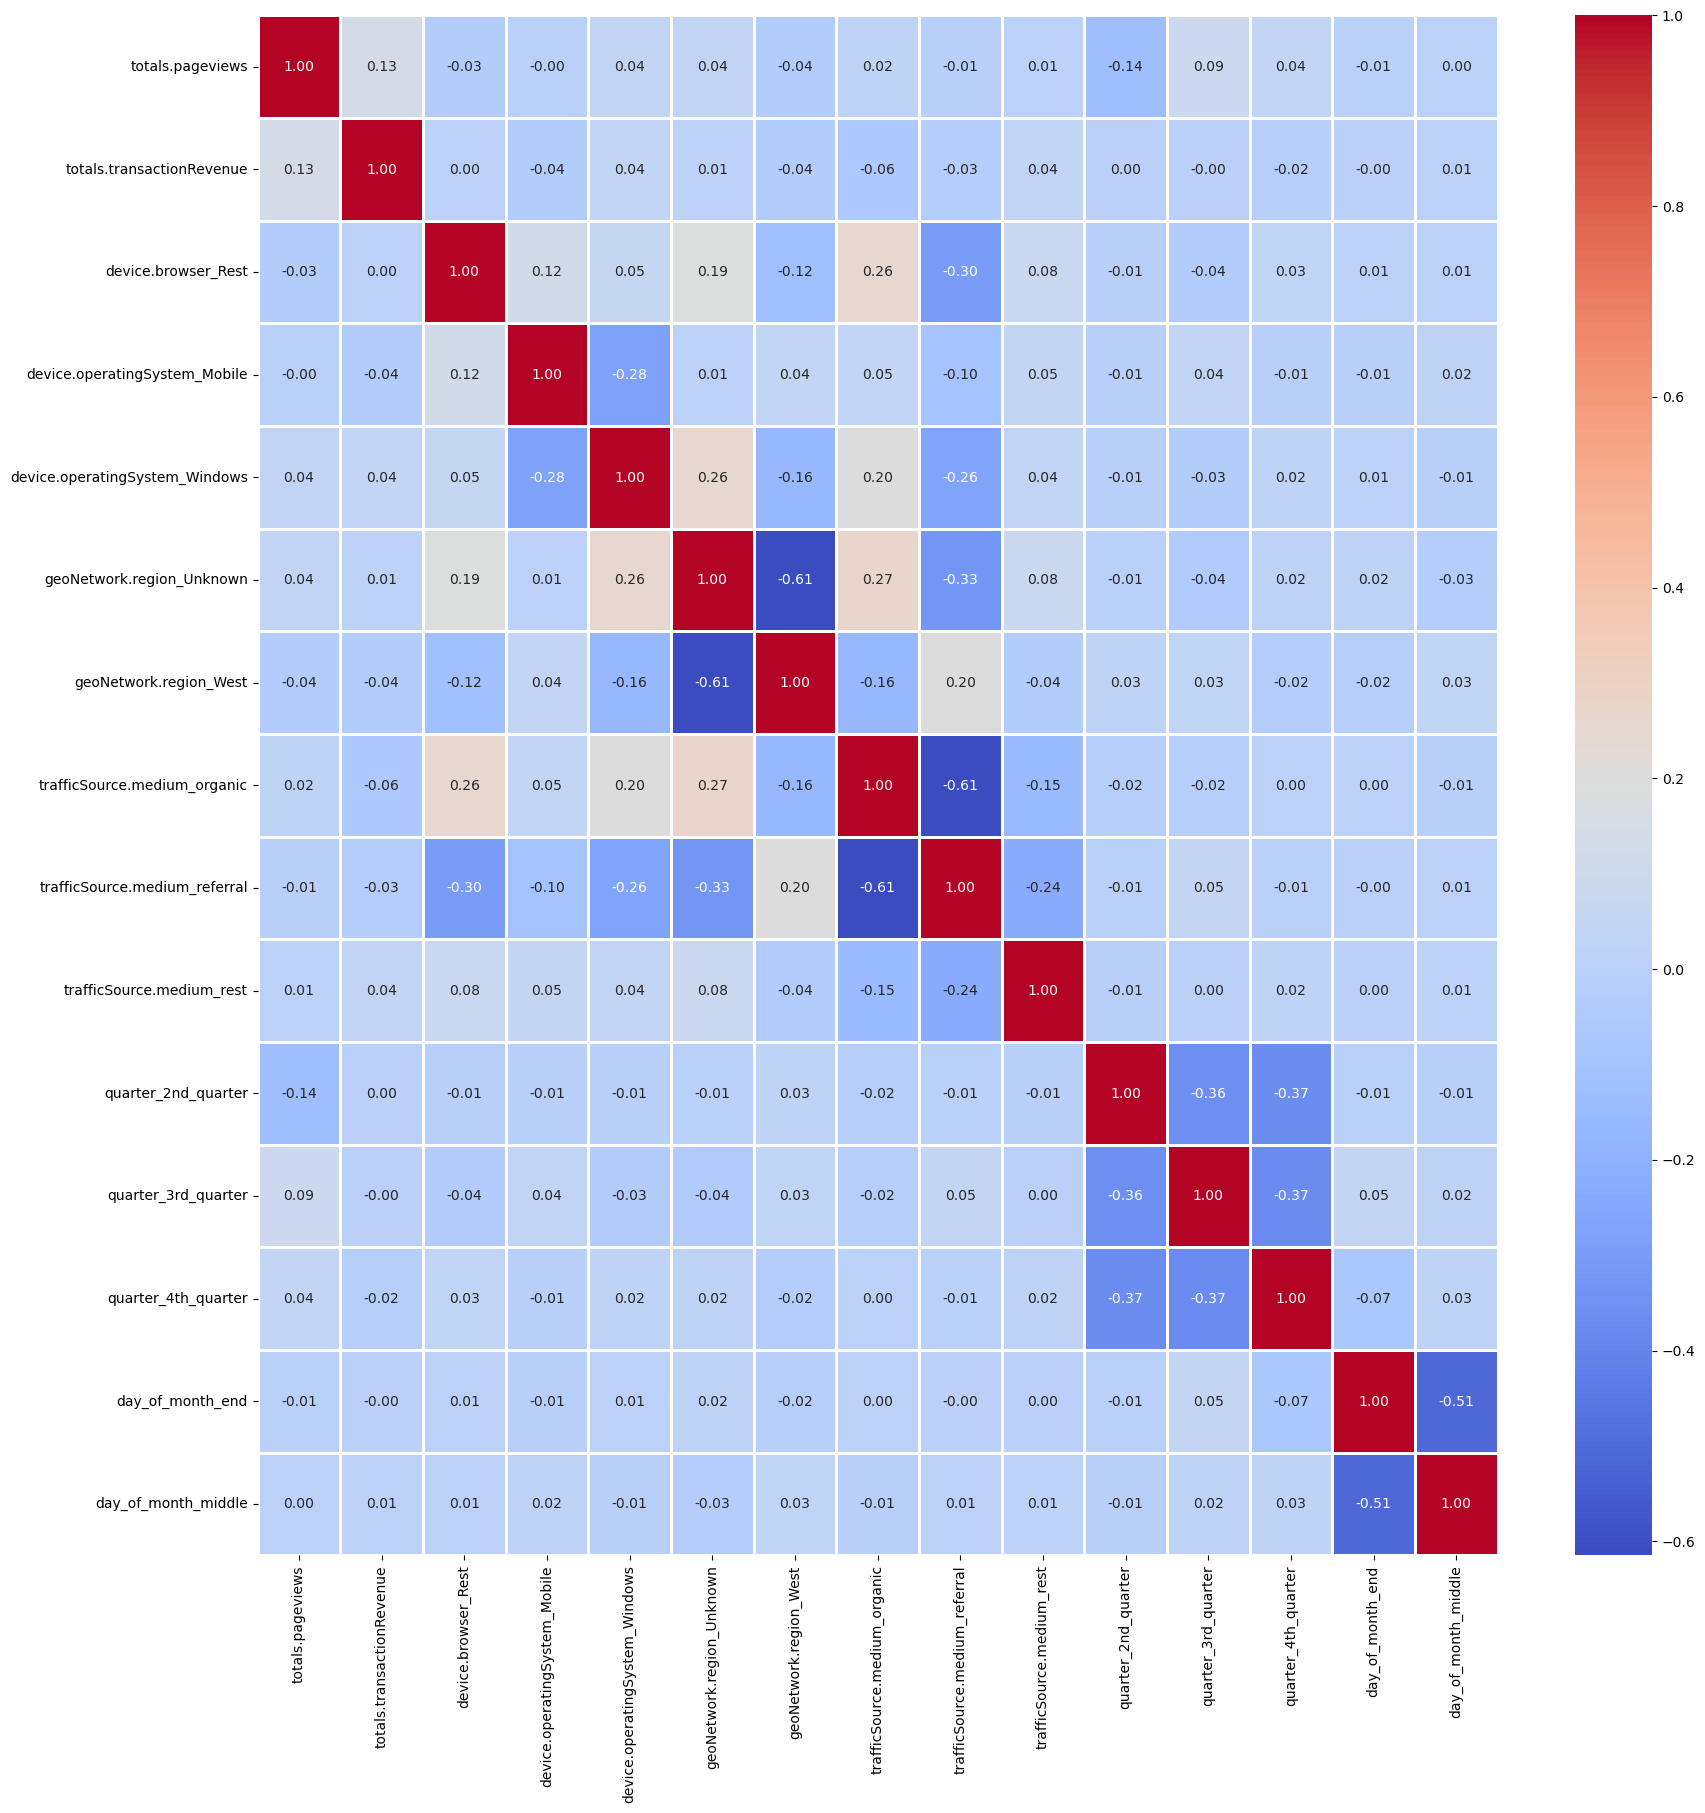

In [168]:
# give me the percentage of each value in the column
for column in df_4.columns:
    print(df_4[column].value_counts(normalize=True))
    print('\n')

# check the correlation between the columns
correlation = df_4.corr()
correlation

# plot the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()


# MODELING 
* above are data engineering
* below are modeling 


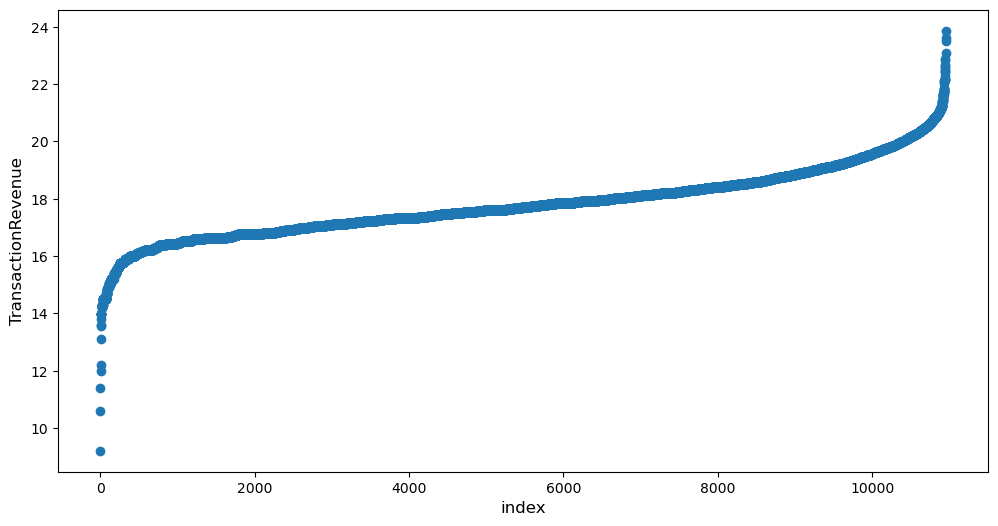

In [153]:
# plot the revenue
plt.figure(figsize=(12,6))
plt.scatter(range(df_4.shape[0]), np.sort(np.log1p(df_4["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()


## Reveue before Log


In [154]:
df_5 = df_4.copy()
# get me the stats of the revenue in a table
print(df_5['totals.transactionRevenue'].min())
print(df_5['totals.transactionRevenue'].max())


10000.0
23129500000.0


## After MIN MAX AND LOG


In [155]:
# Min max on target
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#df_5['totals.transactionRevenue'] = scaler.fit_transform(df_5['totals.transactionRevenue'].values.reshape(-1,1))

df_5['totals.transactionRevenue'] = np.log1p(df_5['totals.transactionRevenue'].values)


In [156]:
# get me the stats of the revenue in a table
print(df_5['totals.transactionRevenue'].min())
print(df_5['totals.transactionRevenue'].max())

9.210440366976517
23.86437469605166


In [157]:
df_5.head()

totals.pageviews totals.newVisits  totals.transactionRevenue  \
752                11                1                  17.449406   
753                10                0                  19.541283   
799                11                0                  18.035459   
802                12                0                  17.083177   
859                14                0                  20.168401   

     device.browser_Rest  device.operatingSystem_Mobile  \
752                    0                              1   
753                    0                              0   
799                    0                              1   
802                    0                              0   
859                    0                              0   

     device.operatingSystem_Windows  geoNetwork.region_Unknown  \
752                               0                          0   
753                               0                          0   
799                               0                          0   
802                               1                          0   
859                               0                          1   

     geoNetwork.region_West  trafficSource.medium_organic  \
752                       0                             0   
753                       0                             1   
799                       0                             0   
802                       1                             0   
859                       0                             0   

     trafficSource.medium_referral  trafficSource.medium_rest  \
752                              0                          0   
753                              0                          0   
799                              1                          0   
802                              1                          0   
859                              1                          0   

     quarter_2nd_quarter  quarter_3rd_quarter  quarter_4th_quarter  \
752                    0                    1                    0   
753                    0                    1                    0   
799                    0                    1                    0   
802                    0                    1                    0   
859                    0                    1                    0   

     day_of_month_end  day_of_month_middle  
752                 0                    0  
753                 0                    0  
799                 0                    0  
802                 0                    0  
859                 0                    0

## BASE MODEL - Linear Regression


Mean Squared Error: 1.2553020337491887
Mean Absolute Error: 0.8631839361660864
Median Absolute Error: 0.6871135181393289
Cross-validated scores: [0.85842117 0.81551634 0.85596021 0.87236524 0.85582436]
Average score: 0.8516174625464815
Intercept: 17.81686178043045
Coefficients: [ 0.30593111 -0.2029752  -0.084798   -0.0948675  -0.04434118 -0.12262109
 -0.10740589 -0.22252321 -0.16723227 -0.05742755  0.00887766 -0.01104059
 -0.03370372 -0.00427124  0.00217226]
Features: Index(['totals.pageviews', 'totals.newVisits', 'device.browser_Rest',
       'device.operatingSystem_Mobile', 'device.operatingSystem_Windows',
       'geoNetwork.region_Unknown', 'geoNetwork.region_West',
       'trafficSource.medium_organic', 'trafficSource.medium_referral',
       'trafficSource.medium_rest', 'quarter_2nd_quarter',
       'quarter_3rd_quarter', 'quarter_4th_quarter', 'day_of_month_end',
       'day_of_month_middle'],
      dtype='object')


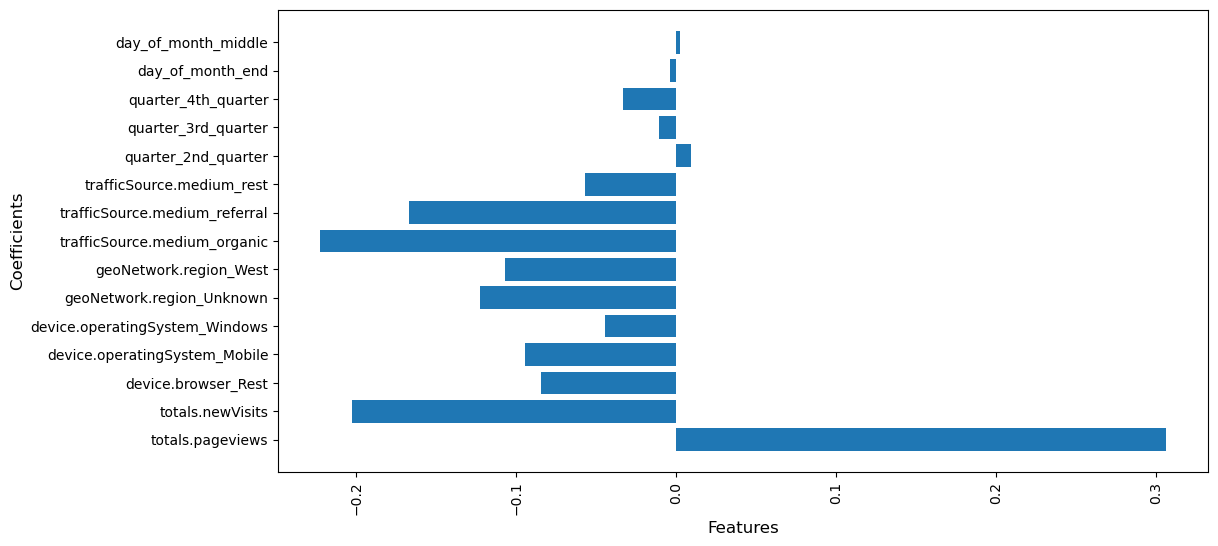

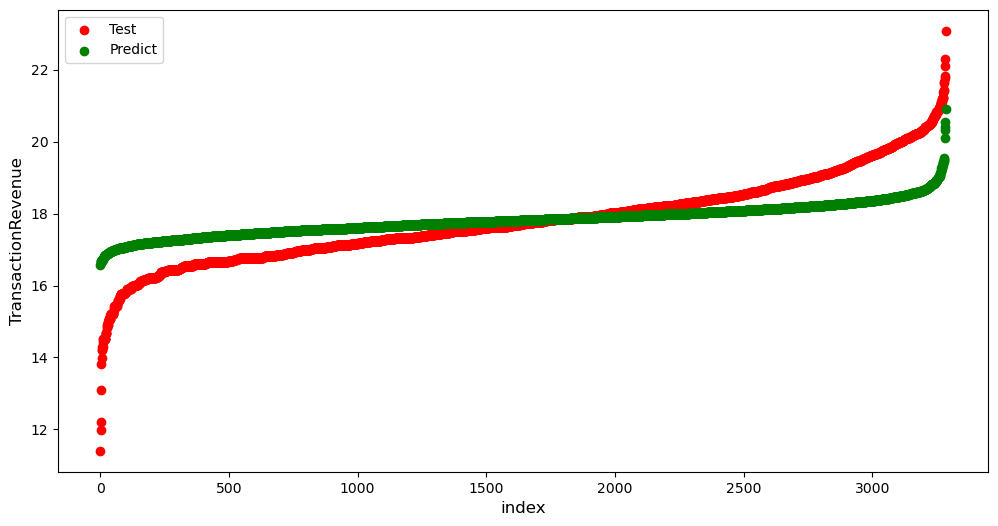

In [158]:
# Split the data into features and target
X = df_5.drop(columns='totals.transactionRevenue')
y = df_5['totals.transactionRevenue']

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize a standard scaler
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X_train)

# Scale the train and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, median_absolute_error

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Median Absolute Error
dae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)




print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", dae)



#cross validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores
print('Cross-validated scores:', -scores)

# Print the average score
print('Average score:', -scores.mean())

# intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Features:", X.columns)

# plot the coefficients
plt.figure(figsize=(12,6))
plt.barh(X.columns, model.coef_)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficients', fontsize=12)
plt.xticks(rotation=90)
plt.show()



# Deviation Plot between Predict and Test in different colors

plt.figure(figsize=(12,6))
plt.scatter(range(y_test.shape[0]), np.sort(y_test), color='r', label='Test')
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred), color='g', label='Predict')

plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.legend()
plt.show()


In [159]:
def lc(x):
    return np.expm1(x)


## Random Forest Regression



Mean Squared Error rfr: 1.4767865786291972
Mean Absolute Error rfr: 0.9416846212787142
Median Absolute Error rfr: 0.7785681531636808
Cross-validated scores: [0.92595225 0.90835246 0.93342571 0.94780889 0.94403123]
Average score: 0.9319141078620603


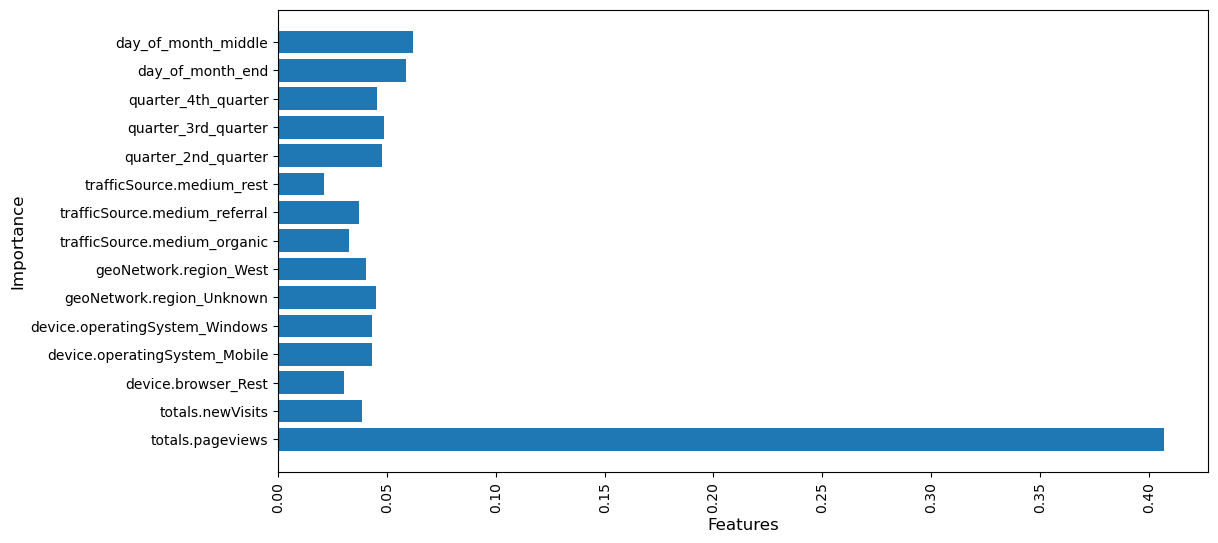

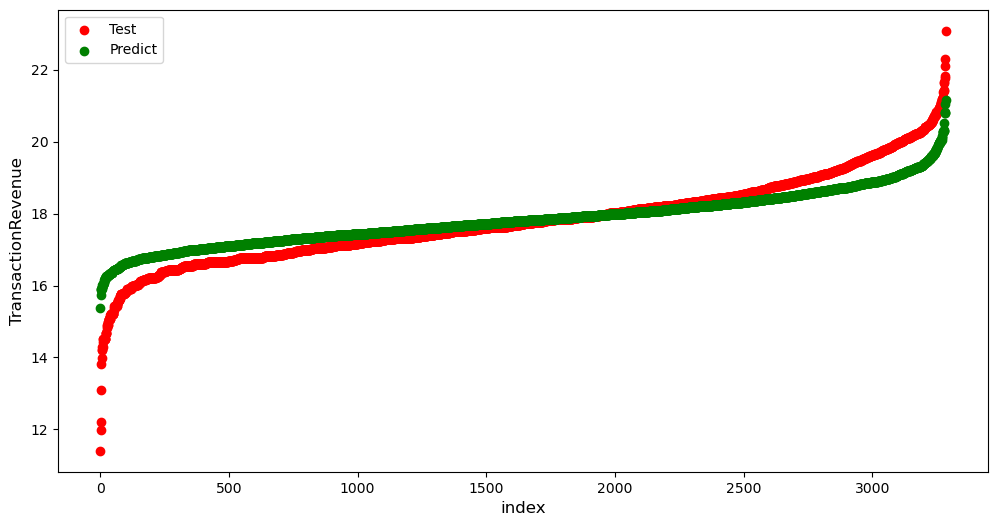

In [160]:
# other regression model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
dae_rfr = median_absolute_error(y_test, y_pred)
mse_rfr = mean_squared_error(y_test, y_pred)
mae_rfr = mean_absolute_error(y_test, y_pred)




print("Mean Squared Error rfr:",mse_rfr)
print("Mean Absolute Error rfr:", mae_rfr)
print("Median Absolute Error rfr:", dae_rfr)


# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores
print('Cross-validated scores:', -scores)

# Print the average score
print('Average score:', -scores.mean())


#plot the feature importance
plt.figure(figsize=(12,6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Deviation Plot between Predict and Test in different colors

plt.figure(figsize=(12,6))
plt.scatter(range(y_test.shape[0]), np.sort(y_test), color='r', label='Test')
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred), color='g', label='Predict')

plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.legend()
plt.show()



## Lasso and Ridge Regression 



Mean Squared Error lasso: 1.3129285103044421
Mean Absolute Error lasso: 0.8822896325408653
Median Absolute Error lasso: 0.7113929687488447
Cross-validated scores lasso : [0.88022993 0.84531319 0.88936473 0.91074682 0.90121395]
Average score lasso: 0.8853737257136396


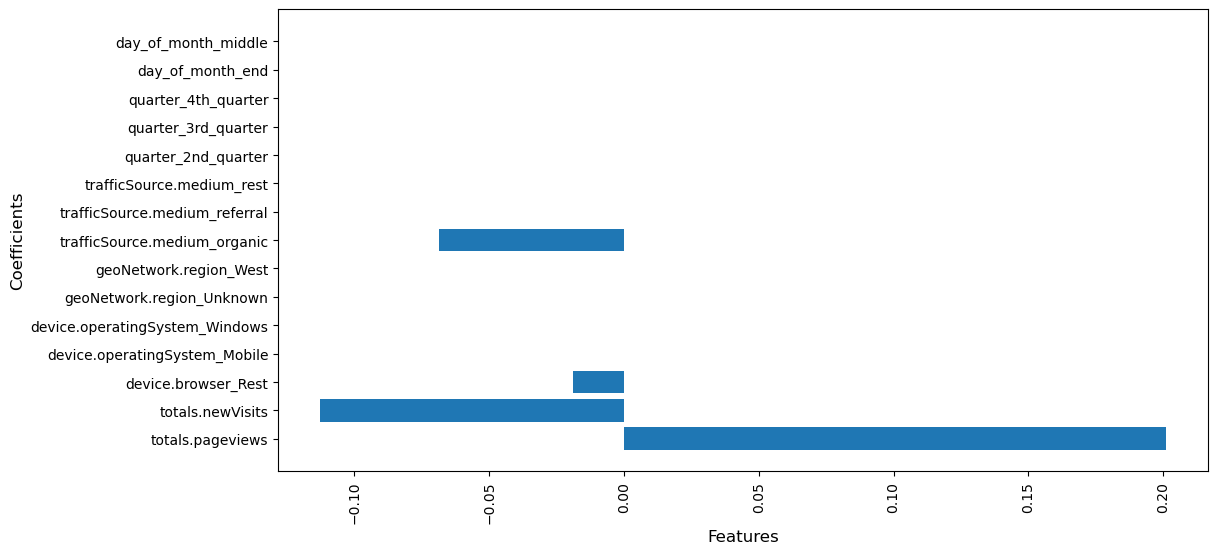

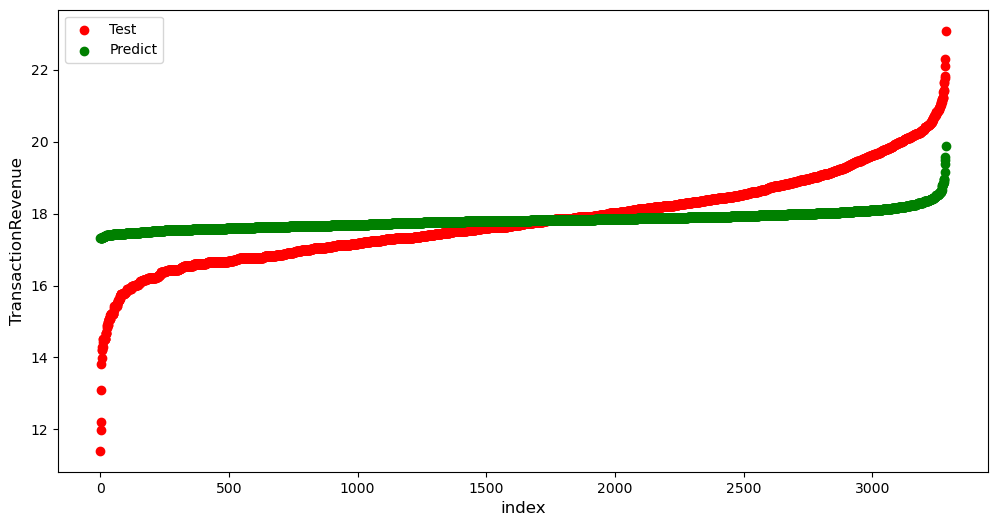

In [161]:
# lasso regression and ridge regression

from sklearn.linear_model import Lasso, Ridge

# Initialize the model
model = Lasso(alpha=0.1)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
dae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error lasso:", mse)
print("Mean Absolute Error lasso:", mae)
print("Median Absolute Error lasso:", dae)

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores
print('Cross-validated scores lasso :', -scores)

# Print the average score
print('Average score lasso:', -scores.mean())

#plot the coefficients
plt.figure(figsize=(12,6))
plt.barh(X.columns, model.coef_)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficients', fontsize=12)
plt.xticks(rotation=90)
plt.show()


# Deviation Plot between Predict and Test in different colors

plt.figure(figsize=(12,6))
plt.scatter(range(y_test.shape[0]), np.sort(y_test), color='r', label='Test')
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred), color='g', label='Predict')

plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.legend()
plt.show()


Mean Squared Error ridge: 1.255301840905268
Mean Absolute Error ridge: 0.863183686584458
Median Absolute Error ridge: 0.6871210618560948
Cross-validated scores ridge : [0.85841856 0.81551492 0.85595857 0.8723664  0.8558236 ]
Average score ridge: 0.8516164129760136


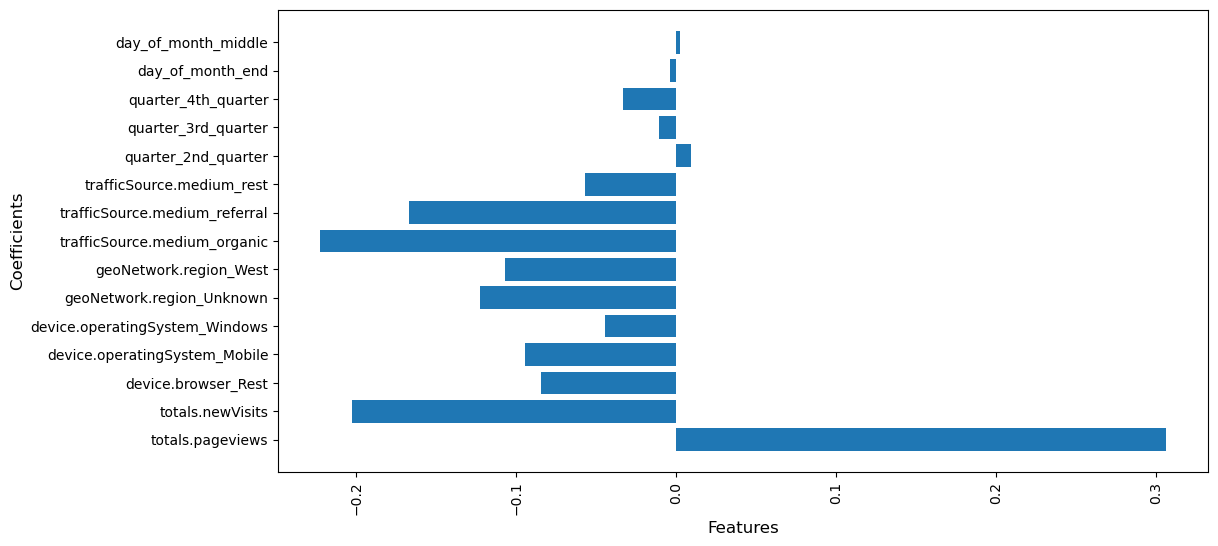

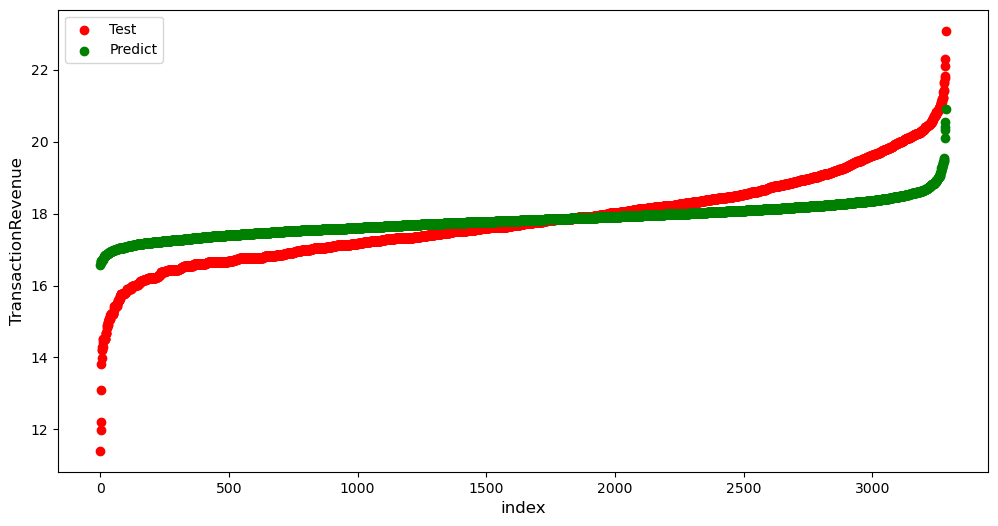

In [162]:

# Initialize the model
model = Ridge(alpha=0.1)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
dae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error ridge:", mse)
print("Mean Absolute Error ridge:", mae)
print("Median Absolute Error ridge:", dae)

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores
print('Cross-validated scores ridge :', -scores)

# Print the average score
print('Average score ridge:', -scores.mean())

#plot the coefficients
plt.figure(figsize=(12,6))
plt.barh(X.columns, model.coef_)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficients', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Deviation Plot between Predict and Test in different colors

plt.figure(figsize=(12,6))
plt.scatter(range(y_test.shape[0]), np.sort(y_test), color='r', label='Test')
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred), color='g', label='Predict')

plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.legend()
plt.show()


## XGBoost

Mean Squared Error xgb: 1.359722321269476
Mean Absolute Error xgb: 0.901661119257582
Median Absolute Error xgb: 0.7384854120054509


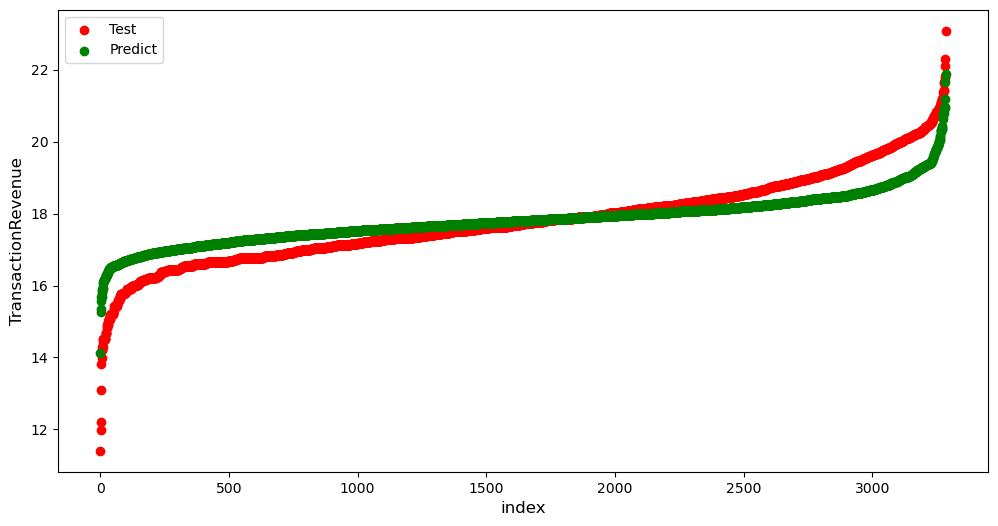

In [170]:
#xgb regression
import xgboost as xgb

# Initialize the model
model = xgb.XGBRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
dae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error xgb:", mse)
print("Mean Absolute Error xgb:", mae)
print("Median Absolute Error xgb:", dae)



# Deviation Plot between Predict and Test in different colors

plt.figure(figsize=(12,6))
plt.scatter(range(y_test.shape[0]), np.sort(y_test), color='r', label='Test')
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred), color='g', label='Predict')

plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.legend()
plt.show()



## SVR

Mean Squared Error svr: 1.2639191609659166
Mean Absolute Error svr: 0.8559963823783391
Median Absolute Error svr: 0.6711483938793492
Cross-validated scores svr : [0.84857646 0.80814385 0.84928007 0.8733592  0.85135905]
Average score svr: 0.8461437269566936


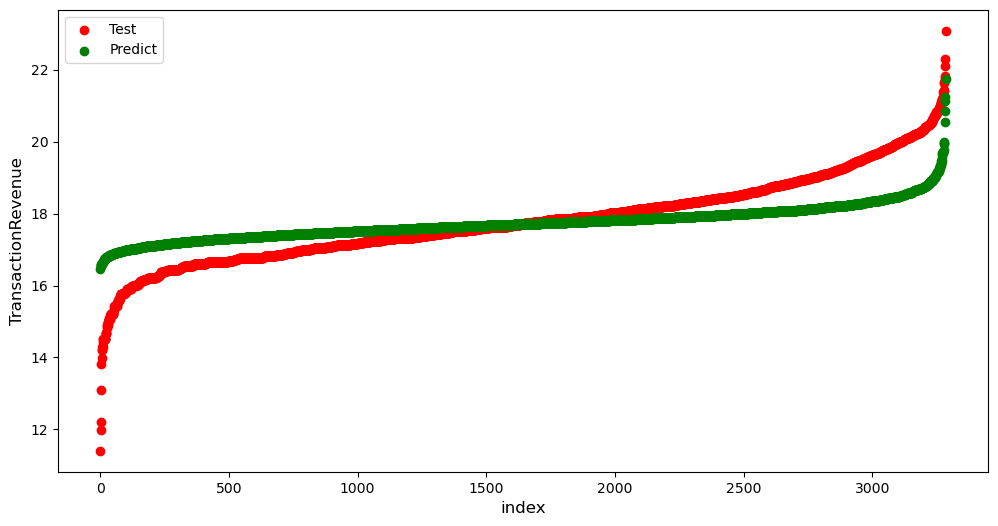

In [164]:
# SVR 
from sklearn.svm import SVR

# Initialize the model
model = SVR(kernel='linear')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
dae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error svr:", mse)
print("Mean Absolute Error svr:", mae)
print("Median Absolute Error svr:", dae)

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores
print('Cross-validated scores svr :', -scores)

# Print the average score
print('Average score svr:', -scores.mean())


# Deviation Plot between Predict and Test in different colors

plt.figure(figsize=(12,6))
plt.scatter(range(y_test.shape[0]), np.sort(y_test), color='r', label='Test')
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred), color='g', label='Predict')

plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.legend()
plt.show()


## GradientBoosting Regressor

Mean Squared Error gbr: 1.2197352952624738
Mean Absolute Error gbr: 0.852128842190661
Median Absolute Error gbr: 0.6811395760995076
Cross-validated scores gbr : [0.84044903 0.80441982 0.84466965 0.86525018 0.84382516]
Average score gbr: 0.8397227680683059


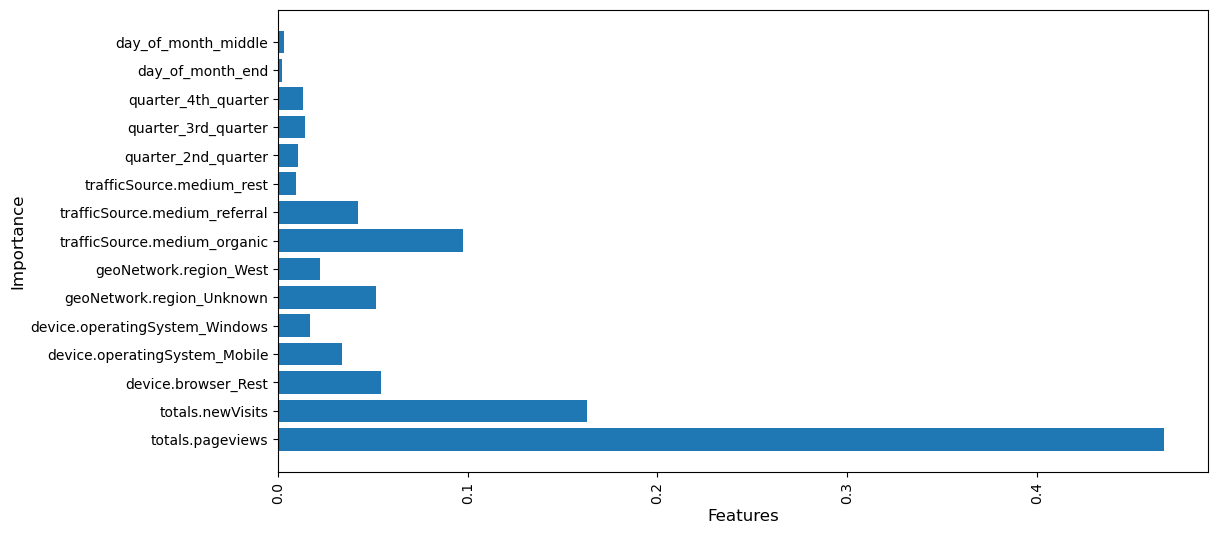

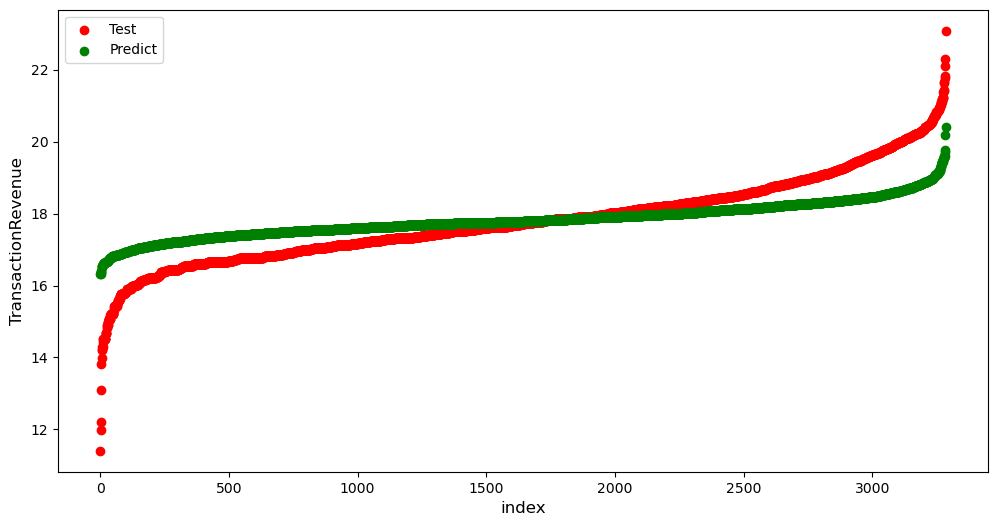

In [165]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
model = GradientBoostingRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
dae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error gbr:", mse)
print("Mean Absolute Error gbr:", mae)
print("Median Absolute Error gbr:", dae)

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores
print('Cross-validated scores gbr :', -scores)

# Print the average score
print('Average score gbr:', -scores.mean())

#plot the feature importance
plt.figure(figsize=(12,6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Deviation Plot between Predict and Test in different colors

plt.figure(figsize=(12,6))
plt.scatter(range(y_test.shape[0]), np.sort(y_test), color='r', label='Test')
plt.scatter(range(y_pred.shape[0]), np.sort(y_pred), color='g', label='Predict')

plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.legend()
plt.show()


## AdaBoostRegressor


Mean Squared Error adb: 1.3661555221913546
Mean Absolute Error adb: 0.9157086970158043
Median Absolute Error adb: 0.7813159158948864
Cross-validated scores adb: [0.89651134 0.84117506 0.89028526 0.90588058 0.90281921]
Average score adb: 0.8873342901131329


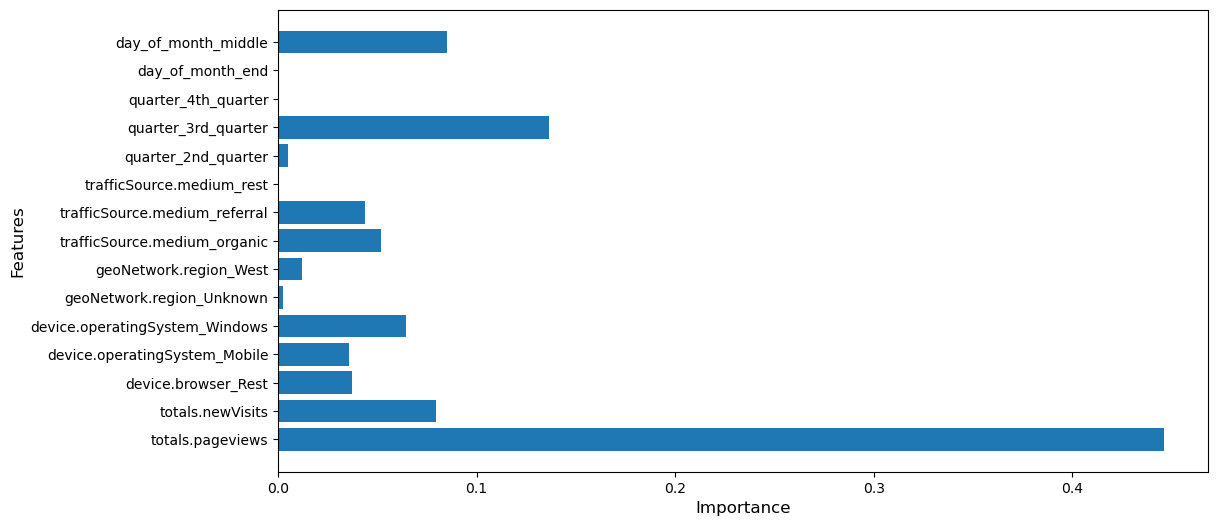

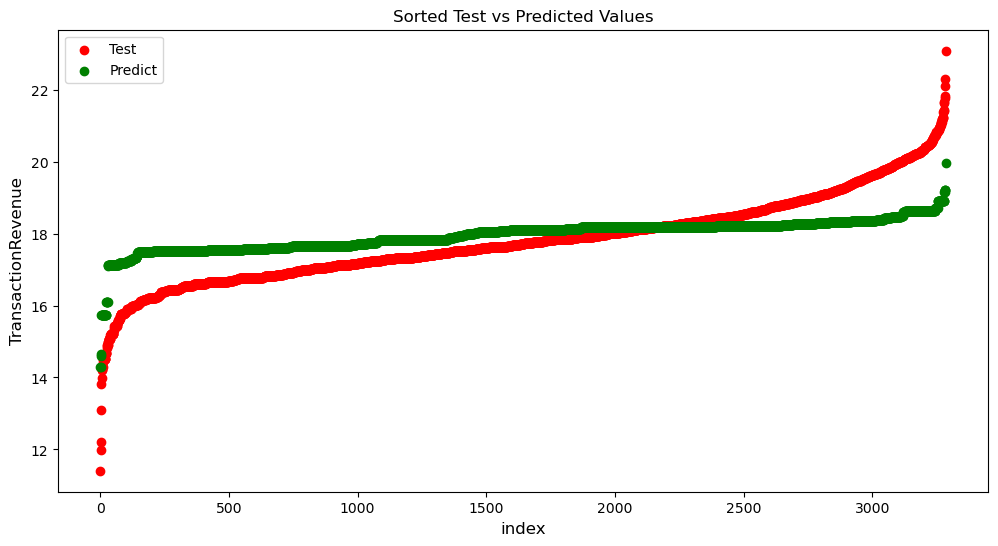

In [166]:
from sklearn.ensemble import AdaBoostRegressor


# Initialize the model
model = AdaBoostRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
dae = median_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error adb:", mse)
print("Mean Absolute Error adb:", mae)
print("Median Absolute Error adb:", dae)

# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores (negated to get positive values)
print('Cross-validated scores adb:', -scores)

# Print the average score
print('Average score adb:', -scores.mean())

# Plot the feature importance
plt.figure(figsize=(12,6))
# If your AdaBoostRegressor uses DecisionTreeRegressor as the base estimator (which is default), 
# you can access feature importances. Otherwise, this might not be available.
if hasattr(model, 'feature_importances_'):
    plt.barh(X.columns, model.feature_importances_)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.show()
else:
    print('Feature importances are not available for the base estimator.')

# Deviation Plot between Predict and Test in different colors
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test)), np.sort(y_test), color='r', label='Test')
plt.scatter(range(len(y_pred)), np.sort(y_pred), color='g', label='Predict')
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.title('Sorted Test vs Predicted Values')
plt.legend()
plt.show()


## Decision Tree


Mean Squared Error (Decision Tree): 2.335621991931603
Mean Absolute Error (Decision Tree): 1.1754001839122272
Median Absolute Error (Decision Tree): 0.9379422904511081
Cross-validated scores (Decision Tree): [1.17243189 1.15729719 1.17649475 1.18016045 1.20238543]
Average score (Decision Tree): 1.1777539425022518


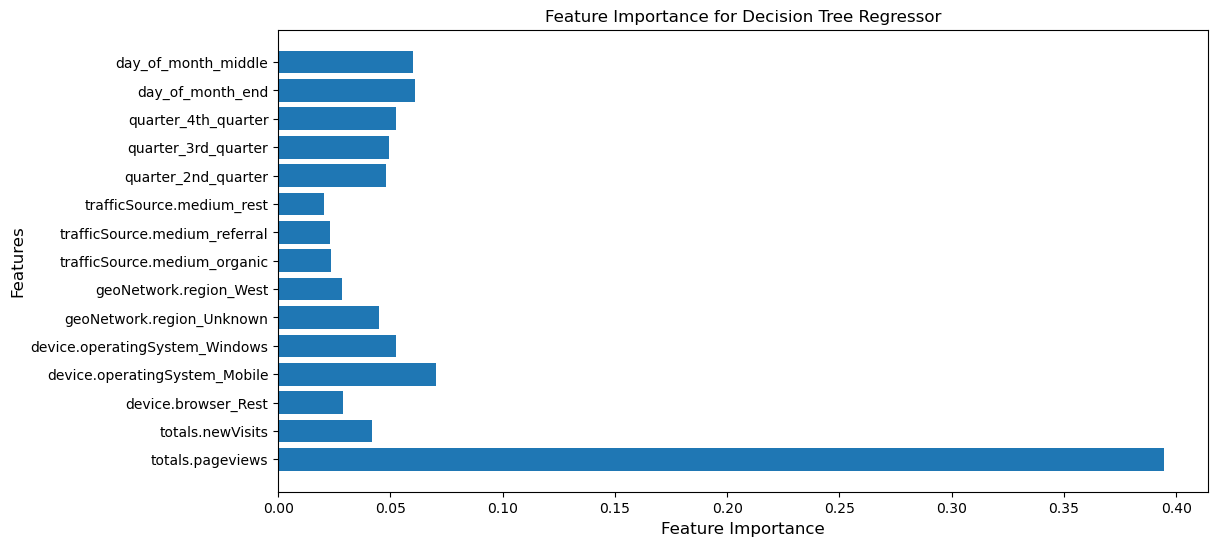

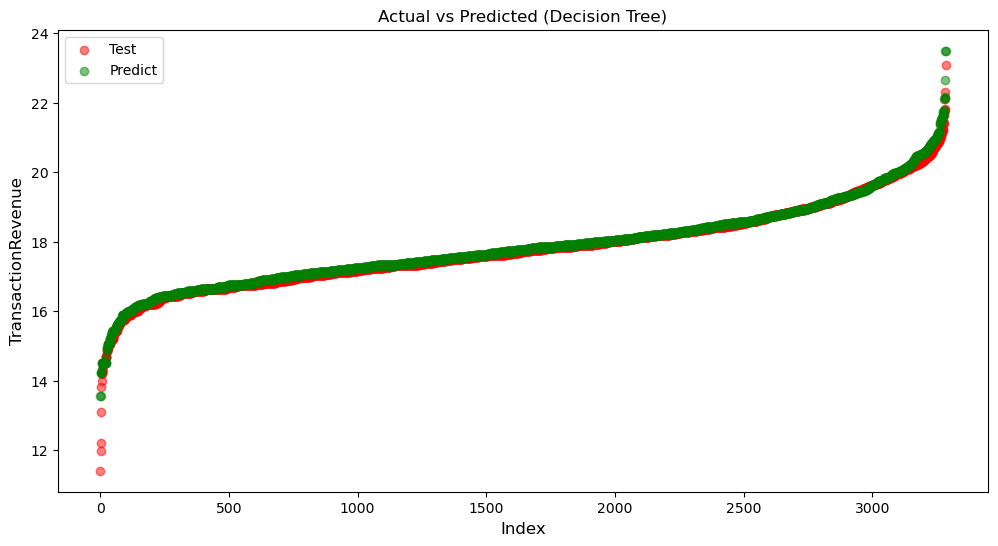

In [171]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the model
dt_model = DecisionTreeRegressor()

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
dae_dt = median_absolute_error(y_test, y_pred_dt)

print("Mean Squared Error (Decision Tree):", mse_dt)
print("Mean Absolute Error (Decision Tree):", mae_dt)
print("Median Absolute Error (Decision Tree):", dae_dt)

# Perform 5-fold cross validation
scores_dt = cross_val_score(dt_model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validated scores (as positive values)
print('Cross-validated scores (Decision Tree):', -scores_dt)

# Print the average score
print('Average score (Decision Tree):', -scores_dt.mean())

# Plot the feature importance
plt.figure(figsize=(12,6))
plt.barh(X.columns, dt_model.feature_importances_)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Decision Tree Regressor')
plt.show()

# Deviation Plot between Predict and Test in different colors
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_test)), np.sort(y_test), color='r', label='Test', alpha=0.5)
plt.scatter(range(len(y_pred_dt)), np.sort(y_pred_dt), color='g', label='Predict', alpha=0.5)

plt.xlabel('Index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.title('Actual vs Predicted (Decision Tree)')
plt.legend()
plt.show()
